# Prediction of Heart Disease using KNN


<img src="heart.jpg" width="80%">

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

We are working for an R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.



## DATASET

The dataset has the following features:

`Age`: age of the patient [years]

`Sex`: sex of the patient [M: Male, F: Female]

`ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

`RestingBP`: resting blood pressure [mm Hg]

`Cholesterol`: serum cholesterol [mm/dl]

`FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

`RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions 
and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

`MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]

`ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]

`Oldpeak`: oldpeak = ST [Numeric value measured in depression]

`ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

`HeartDisease`: output class [1: heart disease, 0: Normal]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

sns.set()

In [2]:
df = pd.read_csv('data/heart_disease_prediction.csv')
display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The heart disease should be a object category and not int

In [4]:
print(f"The dataset has {df.shape[0]} records and {df.shape[1]} columns")

The dataset has 918 records and 12 columns


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Observations:

   1. Average age of patients is 53.5
   2. Resting BP(Blood pressure) and Cholesterol have a minimum value of 0. 
   3. Resting BP(Blood pressure) can not have a value of 0.
   4. Cholesterol can not have a value of 0.
   
   As per the dataset description, Cholesterol contains the serum cholesterol values. And per the [American Heart Association](https://www.heart.org/en/health-topics/cholesterol/about-cholesterol/what-your-cholesterol-levels-mean), serum cholesterol:

   >It is a composite of different measurements. Your total blood cholesterol is calculated by adding your HDL and LDL cholesterol levels, plus 20% of your triglyceride level
    

In [6]:
# Check missing values 
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## EDA

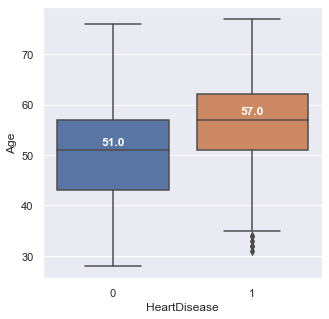

In [8]:
# Common age with heart disease
plt.figure(figsize=(5, 5))
ax = sns.boxplot(data=df, x='HeartDisease', y="Age")
medians = df.groupby(['HeartDisease'])['Age'].median()

for xtick in ax.get_xticks():
    ax.text(xtick, medians[xtick] + 1, medians[xtick], 
            horizontalalignment='center', size=12.0, color='w', weight='semibold')
plt.show()

57 is the median age value for people diagnosed with heart disease.

In [9]:
# Another method for the same 
def annotate(data, **kws):
    medians = data.groupby(['Sex'])['Age'].median()
    ax = plt.gca()

    for xtick in ax.get_xticks():
        ax.text(xtick, medians[xtick] + 1, medians[xtick], 
                horizontalalignment='center', size=12.0, color='w', weight='semibold')


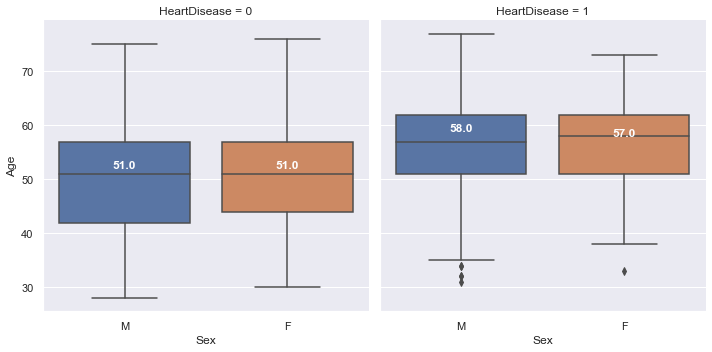

In [10]:
g = sns.catplot(data=df, y="Age", x="Sex", kind="box", col="HeartDisease")

medians = df.groupby(['Sex', 'HeartDisease'])['Age'].median()
g.map_dataframe(annotate)

plt.show()

57 is the median age value for **females** diagnosed with heart disease.

58 is the median age value for **males** diagnosed with heart disease.

In [11]:
heart_disease_df = df.query("HeartDisease == 1")
heart_disease_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [12]:
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

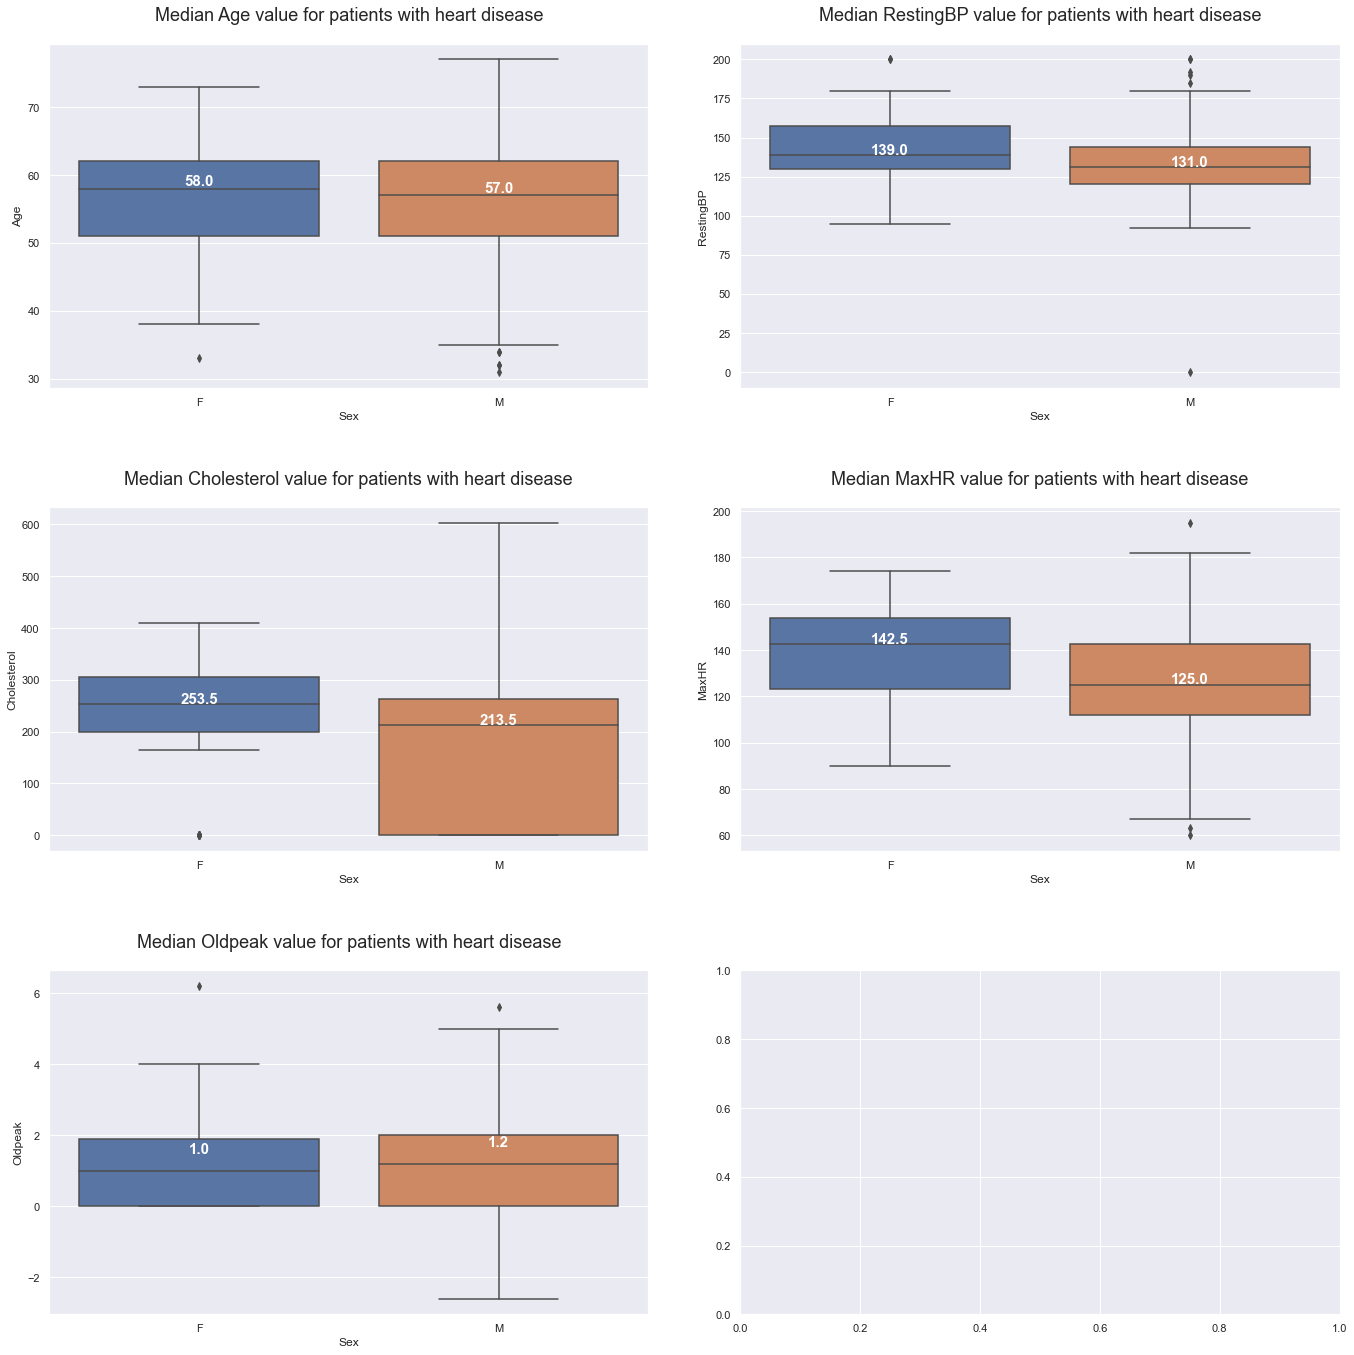

In [13]:

n = int((len(features)+1)/2)
fig, ax = plt.subplots(n, 2, figsize=(20, 20))


for ax, feature in zip(ax.flat, features):
    sns.boxplot(data=heart_disease_df, x='Sex', y=feature, ax=ax)
    medians = heart_disease_df.groupby(['Sex'])[feature].median()

    ax.set_title(f"Median {feature} value for patients with heart disease", y=1.05, fontsize=18)
    for xtick in ax.get_xticks():
        ax.text(xtick, medians[xtick] + 0.5, medians[xtick], 
                horizontalalignment='center', size=15.0, color='w', weight='semibold')


fig.tight_layout(pad=5)
plt.show()
    

Observations:
1. RestingBP in female is high with a value of 139 and that of male is 131.
2. The difference in MaxHR between male and female is high. For females its 142.5 and for males it is 125, a difference of 17.5.
3. The difference in Cholesterol between male and female is high. For females its 253.5 and for males it is 213.5, a difference of 40.
4. Although the Oldpeak in male is higher than female.

All these observations are for patients diagnosed with heart disease

In [14]:
cat_features = [col for col in df.columns if df[col].dtypes == 'O']

custom_features = cat_features + ['FastingBS', 'HeartDisease']
print(custom_features)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']


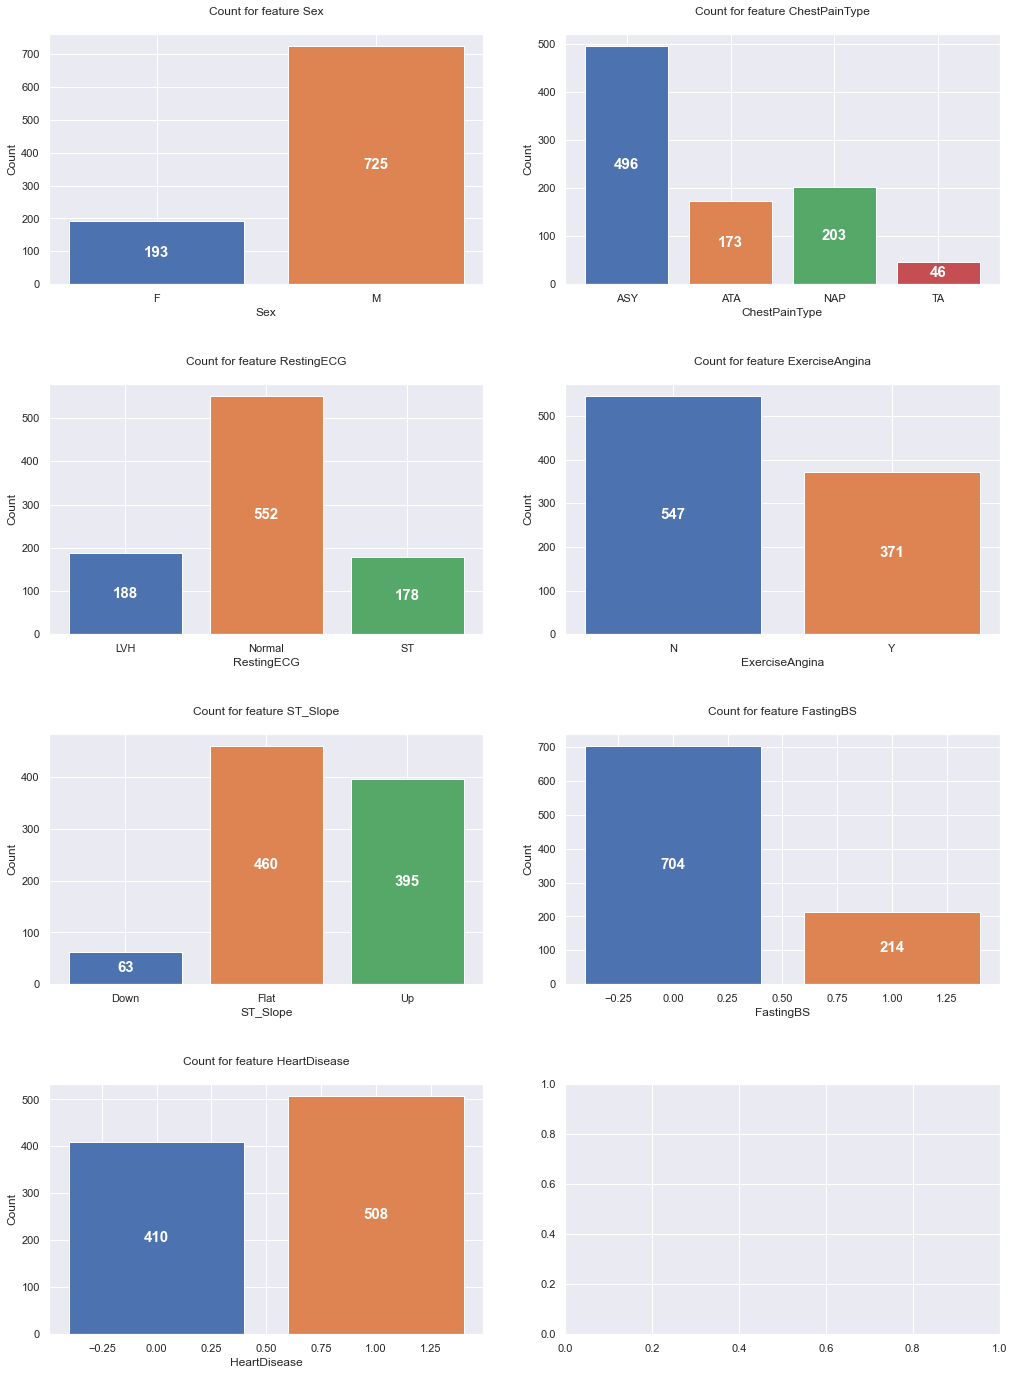

In [15]:
n = int((len(custom_features)+1)/2)
fig, ax = plt.subplots(n, 2, figsize=(15, 20))
color_labels = ["#EF5354", "#1B98F5", "#02B290" , "#F7CD2E"]
color_labels = sns.color_palette("deep", 6)

for ax, feature in zip(ax.flat, custom_features):
    t = df.groupby(feature)[feature].count()
    x = t.index
    y = t.values
    
    p = ax.bar(x, y, color=color_labels[:len(x)])
    ax.bar_label(p, label_type='center', color='white', weight="bold", fontsize=15)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.set_title(f"Count for feature {feature}", y=1.05)

fig.tight_layout(pad=4)
plt.show()    

### Observation:

1. The dataset is highly skewed towards male patients. 725 rows correspond to male patients, whereas only 193 correspond to female patients. This could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.

In [16]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Feature Engineering

### Cleaning Data for RestingBP and Cholesterol



In [17]:
df[['Age', 'Sex', 'RestingBP', 'Cholesterol']]

,Age,Sex,RestingBP,Cholesterol
0,40,M,140,289
1,49,F,160,180
2,37,M,130,283
3,48,F,138,214
4,54,M,150,195
...,...,...,...,...
913,45,M,110,264
914,68,M,144,193
915,57,M,130,131
916,57,F,130,236


We will replace the zeros with the median of the values grouped by the age, sex, for RestingBP and Cholesterol of the patient. 

Since, the resting blood pressure of a female in her 30s with a normal ECG might be lower than what we would get from the median of the entire column.

In [18]:
gp_age_sex_median = df.groupby(['Age', 'Sex']).agg({'RestingBP': np.median, 'Cholesterol': np.median}).reset_index()
# print(gp_age_sex_median)

gp_age_sex_median_df = pd.DataFrame(gp_age_sex_median, columns=['Age', 'Sex', 'RestingBP', 'Cholesterol'])
gp_age_sex_median_df.head(10)
# print(gp_age_sex_median_df.shape)

,Age,Sex,RestingBP,Cholesterol
0,28,M,130.0,132.0
1,29,M,130.0,243.0
2,30,F,170.0,237.0
3,31,F,100.0,219.0
4,31,M,120.0,270.0
5,32,F,105.0,198.0
6,32,M,114.0,239.5
7,33,F,100.0,246.0
8,33,M,120.0,298.0
9,34,F,124.0,185.5


In [19]:
def get_record(age, sex, feature):
    row = gp_age_sex_median_df.query("Age == @age and Sex == @sex")
    return float(row[feature].values)

In [20]:
data = df.copy()

data = data.query('RestingBP == 0')
display(data.head())

data['RestingBP'] = data.apply(lambda x: get_record(x['Age'], x['Sex'], 'RestingBP') , axis=1)
display(data)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,136.0,0,0,Normal,155,N,1.5,Flat,1


In [21]:
df.loc[df['RestingBP'] == 0, 'RestingBP'] = data['RestingBP']

Checking if the update was made

In [22]:
df.query('RestingBP == 0')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [23]:
data = df.copy()

data = data.query('Cholesterol == 0')
display(data.shape)

data['Cholesterol'] = data.apply(lambda x: get_record(x['Age'], x['Sex'], 'Cholesterol') , axis=1)
display(data.shape)



(172, 12)

(172, 12)

In [24]:
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = data['Cholesterol']

Checking if the update was made

In [25]:
df.query('Cholesterol == 0')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
322,38,F,ASY,105,0.0,1,Normal,166,N,2.8,Up,1
375,73,F,NAP,160,0.0,0,ST,121,N,0.0,Up,1
383,38,F,ASY,110,0.0,0,Normal,156,N,0.0,Flat,1


In [26]:
print(get_record(73, 'F', 'Cholesterol'))
print(get_record(38, 'F', 'Cholesterol'))

0.0
0.0


Looks, like the data for female patients of age 38 and 73 have 0 cholesterol, which is not possible and hence we would remove these 3 records

In [27]:
df = df.drop([322, 375, 383], axis=0)

In [28]:
df.query('Cholesterol == 0')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             915 non-null    int64  
 1   Sex             915 non-null    object 
 2   ChestPainType   915 non-null    object 
 3   RestingBP       915 non-null    int64  
 4   Cholesterol     915 non-null    float64
 5   FastingBS       915 non-null    int64  
 6   RestingECG      915 non-null    object 
 7   MaxHR           915 non-null    int64  
 8   ExerciseAngina  915 non-null    object 
 9   Oldpeak         915 non-null    float64
 10  ST_Slope        915 non-null    object 
 11  HeartDisease    915 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 92.9+ KB


In [30]:
df = pd.get_dummies(data=df, drop_first=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                915 non-null    int64  
 1   RestingBP          915 non-null    int64  
 2   Cholesterol        915 non-null    float64
 3   FastingBS          915 non-null    int64  
 4   MaxHR              915 non-null    int64  
 5   Oldpeak            915 non-null    float64
 6   HeartDisease       915 non-null    int64  
 7   Sex_M              915 non-null    uint8  
 8   ChestPainType_ATA  915 non-null    uint8  
 9   ChestPainType_NAP  915 non-null    uint8  
 10  ChestPainType_TA   915 non-null    uint8  
 11  RestingECG_Normal  915 non-null    uint8  
 12  RestingECG_ST      915 non-null    uint8  
 13  ExerciseAngina_Y   915 non-null    uint8  
 14  ST_Slope_Flat      915 non-null    uint8  
 15  ST_Slope_Up        915 non-null    uint8  
dtypes: float64(2), int64(5), u

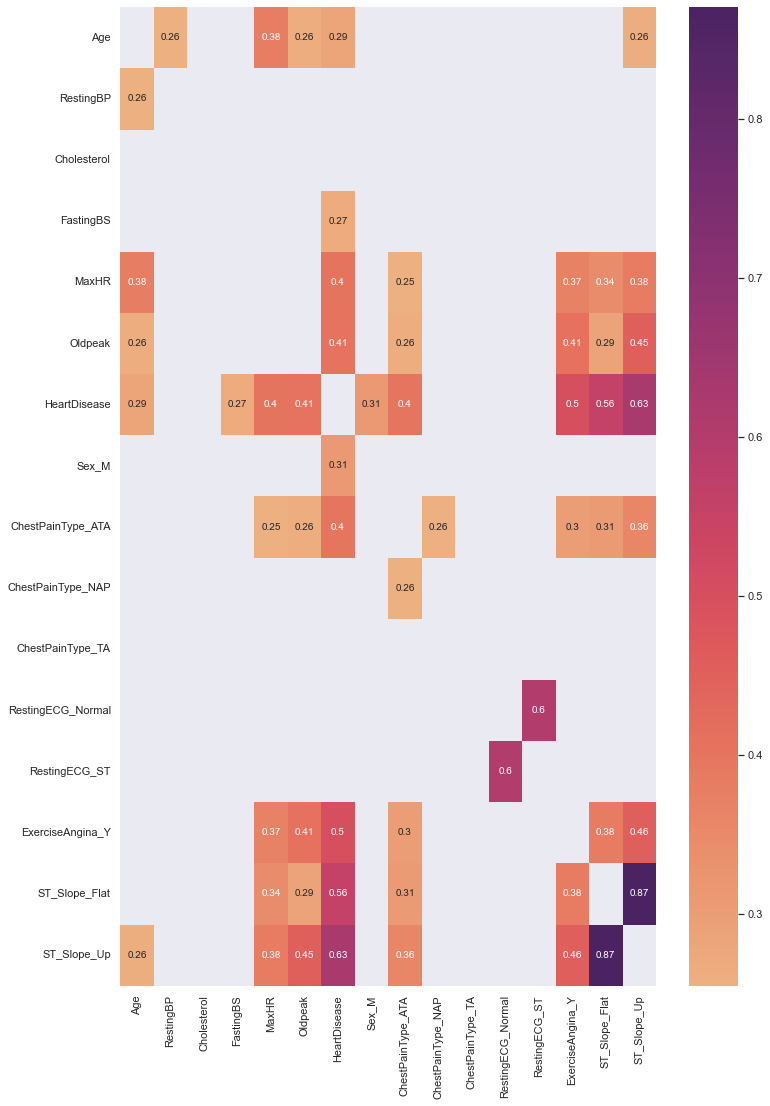

In [32]:
correlations=abs(df.corr())

# Create heatmap with only high correlation values to avoid overcrowding and increase readability.
plt.figure(figsize=(12,18))
sns.heatmap(correlations[(correlations>0.25)&(correlations<1)], cmap='flare', annot=True)
plt.show()

In [33]:
threshold = 0.3
features = [col for col in df.columns]

features_select = []
for feature in features: 
    print(f"The correlation between HeartDisease and {feature} is {round(df['HeartDisease'].corr(df[feature]),4)}")
    if abs(round(df['HeartDisease'].corr(df[feature]),4)) >= threshold:
        features_select.append(feature)

The correlation between HeartDisease and Age is 0.2851
The correlation between HeartDisease and RestingBP is 0.1199
The correlation between HeartDisease and Cholesterol is 0.0191
The correlation between HeartDisease and FastingBS is 0.2675
The correlation between HeartDisease and MaxHR is -0.4027
The correlation between HeartDisease and Oldpeak is 0.4054
The correlation between HeartDisease and HeartDisease is 1.0
The correlation between HeartDisease and Sex_M is 0.3135
The correlation between HeartDisease and ChestPainType_ATA is -0.4012
The correlation between HeartDisease and ChestPainType_NAP is -0.2145
The correlation between HeartDisease and ChestPainType_TA is -0.0542
The correlation between HeartDisease and RestingECG_Normal is -0.0922
The correlation between HeartDisease and RestingECG_ST is 0.1019
The correlation between HeartDisease and ExerciseAngina_Y is 0.4979
The correlation between HeartDisease and ST_Slope_Flat is 0.5568
The correlation between HeartDisease and ST_Slop

I have taken threshold to be 0.3. After looking at the correlations we found out that Cholesterol and Resting BP are not that correlated to HeartDisease as compared to other features.

In [34]:
print(features_select)

['MaxHR', 'Oldpeak', 'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']


## Building KNN Classifier

In [35]:
final_df = df[features_select]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 917
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MaxHR              915 non-null    int64  
 1   Oldpeak            915 non-null    float64
 2   HeartDisease       915 non-null    int64  
 3   Sex_M              915 non-null    uint8  
 4   ChestPainType_ATA  915 non-null    uint8  
 5   ExerciseAngina_Y   915 non-null    uint8  
 6   ST_Slope_Flat      915 non-null    uint8  
 7   ST_Slope_Up        915 non-null    uint8  
dtypes: float64(1), int64(2), uint8(5)
memory usage: 33.1 KB


In [36]:
data = final_df.copy()
data['HeartDisease'] = data['HeartDisease'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 917
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   MaxHR              915 non-null    int64   
 1   Oldpeak            915 non-null    float64 
 2   HeartDisease       915 non-null    category
 3   Sex_M              915 non-null    uint8   
 4   ChestPainType_ATA  915 non-null    uint8   
 5   ExerciseAngina_Y   915 non-null    uint8   
 6   ST_Slope_Flat      915 non-null    uint8   
 7   ST_Slope_Up        915 non-null    uint8   
dtypes: category(1), float64(1), int64(1), uint8(5)
memory usage: 26.9 KB


In [37]:
# defining our dependent and independent variables

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

print(X.shape, y.shape)

(915, 7) (915,)


In [38]:
display(X.head())

,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,172,0.0,1,1,0,0,1
1,156,1.0,0,0,0,1,0
2,98,0.0,1,1,0,0,1
3,108,1.5,0,0,1,1,0
4,122,0.0,1,0,0,0,1


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(732, 7) (183, 7) (732,) (183,)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.spatial.distance import minkowski, euclidean, cityblock

In [43]:
knn = KNeighborsClassifier()

In [44]:
params = {
    'n_neighbors': [i for i in range(3, 16) if i%2 != 0],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [i for i in range(10, 101, 10)],
    'metric': ['minkowski', 'euclidean', 'cityblock']
}

In [45]:
search = RandomizedSearchCV(knn, params, cv=5, scoring='accuracy')
best_clf = search.fit(X_train, y_train)

In [46]:
print(best_clf.best_params_)
print(best_clf.best_score_)

{'p': 2, 'n_neighbors': 5, 'metric': 'cityblock', 'leaf_size': 70, 'algorithm': 'kd_tree'}
0.8114993942782593


In [47]:
best_clf.score(X_train, y_train)

0.8483606557377049

In [48]:
y_pred = best_clf.predict(X_test)

In [49]:
best_clf.score(X_test, y_test)

0.8415300546448088

## Evaluation

In [50]:
from sklearn.metrics import accuracy_score, classification_report, recall_score

In [51]:
accuracy_score(y_test, y_pred)

0.8415300546448088

In [52]:
recall_score(y_test, y_pred)

0.8725490196078431

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82        81
           1       0.85      0.87      0.86       102

    accuracy                           0.84       183
   macro avg       0.84      0.84      0.84       183
weighted avg       0.84      0.84      0.84       183

